##### The "Fruit-360" dataset was downloaded from Kaggle, and unwanted fruit categories were removed. We retained various varieties of fruits within specific fruit categories but eliminated categories beyond apples, focusing only on this particular fruit category. Despite reducing the dataset to 28 different fruit categories, it remains sufficient for training the model. 

In [1]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

2023-11-24 12:13:18.835484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Let's Apply ANN and CNN of Fruit dataset , the dataset contain 28 different categories of Fruit images with the size of (100,100)

### Load the Dataset and get Train and Test set of data

In [2]:
# Define paths to the training and testing data
train_data_dir = '../data/fruits-360/Training'
test_data_dir = '../data/fruits-360/Test'


def load_data(data_directory):
    images = []
    labels = []
    for sub_directory in os.listdir(data_directory): # iterating through each directory
        
        sub_directory_path = os.path.join(data_directory, sub_directory)
          # Skip non-directory items
        if not os.path.isdir(sub_directory_path):
            continue

        # Skip the .DS_Store file inside directories
        if sub_directory == ".DS_Store":
            continue
                
        # print(images_path)
        for image_fruit in os.listdir(sub_directory_path):
         
            image_path = os.path.join(sub_directory_path, image_fruit)
            
           # Skip non-image files
            if image_fruit == ".DS_Store":
                continue
                
       
            # print(sub_directory)
            img = load_img(image_path, target_size=(100, 100))
            img_array = img_to_array(img)
            img_array /= 255.0  # Normalize the pixel values

            # Append the image and its label to the lists
            images.append(img_array)
            labels.append(sub_directory)
    return np.array(images), np.array(labels)

In [3]:
x_train, y_train = load_data(train_data_dir)
x_test, y_test = load_data(test_data_dir)

### Let's check the train data set

In [4]:
y_train

array(['Blueberry', 'Blueberry', 'Blueberry', ..., 'Cantaloupe 1',
       'Cantaloupe 1', 'Cantaloupe 1'], dtype='<U18')

#### As we have categorical value in Train data it need to transfer in numeric for train model using LabelEncoder

### Convert the data to integer labels using LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()

# Fit and transform on training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform on testing data (use the same encoder fitted on training data)
y_test_encoded = label_encoder.transform(y_test)

# Convert integer labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

In [6]:
# Reshape your input data if needed (adjust the shape based on your image dimensions)
X_train_flattened = x_train.reshape(len(x_train), 100 * 100 * 3)
X_test_flattened = x_test.reshape(len(x_test), 100 * 100 * 3)

In [7]:
y_train_one_hot.shape

(14046, 28)

### ANN with Dense layer

In [8]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(28, input_shape=(100 * 100 * 3,), activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # Use categorical crossentropy for one-hot encoded labels
    metrics=["accuracy"]
)

# Train the model
model.fit(X_train_flattened, y_train_one_hot, epochs=10)

Epoch 1/10
439/439 [==============================] - 5s 9ms/step - loss: 2.4333 - accuracy: 0.7947
Epoch 2/10
439/439 [==============================] - 3s 7ms/step - loss: 0.8254 - accuracy: 0.8832
Epoch 3/10
439/439 [==============================] - 3s 6ms/step - loss: 0.3906 - accuracy: 0.9471
Epoch 4/10
439/439 [==============================] - 3s 6ms/step - loss: 0.2674 - accuracy: 0.9627
Epoch 5/10
439/439 [==============================] - 3s 7ms/step - loss: 0.3092 - accuracy: 0.9613
Epoch 6/10
439/439 [==============================] - 3s 6ms/step - loss: 0.3587 - accuracy: 0.9578
Epoch 7/10
439/439 [==============================] - 3s 7ms/step - loss: 0.3457 - accuracy: 0.9608
Epoch 8/10
439/439 [==============================] - 3s 6ms/step - loss: 0.5114 - accuracy: 0.9613
Epoch 9/10
439/439 [==============================] - 3s 7ms/step - loss: 0.1783 - accuracy: 0.9812
Epoch 10/10
439/439 [==============================] - 3s 7ms/step - loss: 0.1677 - accuracy: 0.9826

### Evaluate the model on the test set

In [9]:
model.evaluate(X_test_flattened, y_test_one_hot)

148/148 [==============================] - 2s 8ms/step - loss: 3.2849 - accuracy: 0.8415


[3.2848594188690186, 0.8415462970733643]

### For ANN accuracy score is 0.8415 and Loss is 3.2849

### Let's check Precision, Recall and F1 score of this model

In [10]:
from sklearn.metrics import classification_report
import numpy as np
# Make predictions
predictions = model.predict(X_test_flattened)

# Convert one-hot encoded labels back to single labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test_labels, predicted_labels)

print("Classification Report:")
print(report)

148/148 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       164
           1       1.00      0.71      0.83       164
           2       0.94      0.94      0.94       143
           3       0.92      1.00      0.96       166
           4       0.66      0.49      0.56       166
           5       0.72      0.63      0.67       152
           6       1.00      0.39      0.56       166
           7       0.77      0.77      0.77       150
           8       1.00      0.95      0.97       154
           9       0.97      0.69      0.81       166
          10       1.00      1.00      1.00       164
          11       0.73      1.00      0.84       164
          12       1.00      1.00      1.00       166
          13       0.71      1.00      0.83       234
          14       1.00      0.91      0.95       164
          15       0.95      0.98      0.97       246
   

#### As we can see, we get Precision = 0.89, Recall = 0.84 and F1 score of this model is 0.84

### Now let's make Confusion matrix 

In [11]:
y_predicted = model.predict(X_test_flattened)

148/148 [==============================] - 0s 2ms/step


In [12]:
np.argmax(y_predicted[2])

8

In [13]:
y_predicted_labels = [np.argmax(val) for val in y_predicted]
y_predicted_labels[:10]

[8, 8, 8, 8, 8, 20, 8, 8, 8, 8]

In [14]:
np.argmax(y_test_one_hot[725])

27

In [15]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test_encoded, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

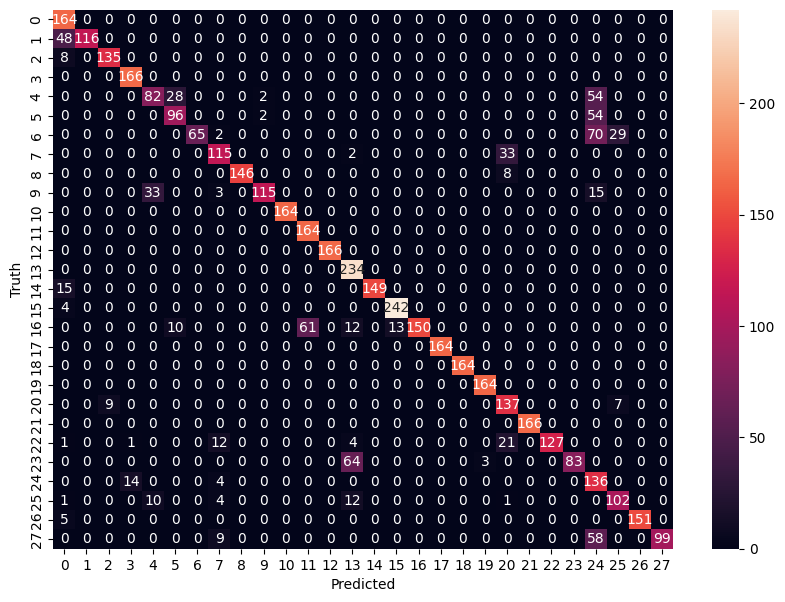

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Let's add three more hidden layer to improve accuracy of the model

##### Here we added relu as a hidden Layer

In [17]:
from tensorflow import keras

model = keras.Sequential([
    # keras.layers.Dense(128, input_shape=(100 * 100 * 3,), activation="relu"),  # Hidden layer
    # keras.layers.Dense(28, activation="softmax")  # Output layer with softmax activation for multiclass classification
    
    keras.layers.Dense(256, input_shape=(100 * 100 * 3,), activation="relu"),  # First hidden layer
    keras.layers.Dense(128, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(56, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(28, activation="softmax")  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(X_train_flattened, y_train_one_hot, epochs=10)


Epoch 1/10
439/439 [==============================] - 30s 65ms/step - loss: 2.2276 - accuracy: 0.3773
Epoch 2/10
439/439 [==============================] - 27s 62ms/step - loss: 0.2522 - accuracy: 0.9200
Epoch 3/10
439/439 [==============================] - 27s 63ms/step - loss: 0.1039 - accuracy: 0.9626
Epoch 4/10
439/439 [==============================] - 27s 61ms/step - loss: 0.1149 - accuracy: 0.9630
Epoch 5/10
439/439 [==============================] - 28s 63ms/step - loss: 0.0464 - accuracy: 0.9843
Epoch 6/10
439/439 [==============================] - 27s 61ms/step - loss: 0.1045 - accuracy: 0.9710
Epoch 7/10
439/439 [==============================] - 26s 60ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 8/10
439/439 [==============================] - 27s 61ms/step - loss: 0.0755 - accuracy: 0.9758
Epoch 9/10
439/439 [==============================] - 26s 60ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 10/10
439/439 [==============================] - 26s 59ms/step - loss: 0.099

### Now Let's Evaluate the Model

In [18]:
# Evaluate the model on the test set
model.evaluate(X_test_flattened, y_test_one_hot)

148/148 [==============================] - 2s 8ms/step - loss: 0.4830 - accuracy: 0.9199


[0.48298969864845276, 0.9199235439300537]

#### After adding three hidden layers to the model, we observed an improvement in accuracy scores and a reduction in the value of the loss function to o.4830.

#### Now let's see precision , Recall and F1 score of the model

In [19]:
predictions = model.predict(X_test_flattened)

# Convert one-hot encoded labels back to single labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test_labels, predicted_labels)

print("Classification Report:")
print(report)

148/148 [==============================] - 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       164
           1       0.93      1.00      0.96       164
           2       0.92      1.00      0.96       143
           3       0.86      1.00      0.93       166
           4       0.66      0.86      0.74       166
           5       0.78      0.88      0.83       152
           6       1.00      0.75      0.86       166
           7       0.91      1.00      0.95       150
           8       1.00      1.00      1.00       154
           9       0.91      0.71      0.80       166
          10       0.78      1.00      0.88       164
          11       0.88      0.99      0.93       164
          12       0.73      0.69      0.71       166
          13       0.96      1.00      0.98       234
          14       1.00      1.00      1.00       164
          15       1.00      1.00      1.00       246
   

### Precision = 0.92, Recall = 0.92, F1 = 0.91 which is actually not bed

148/148 [==============================] - 1s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

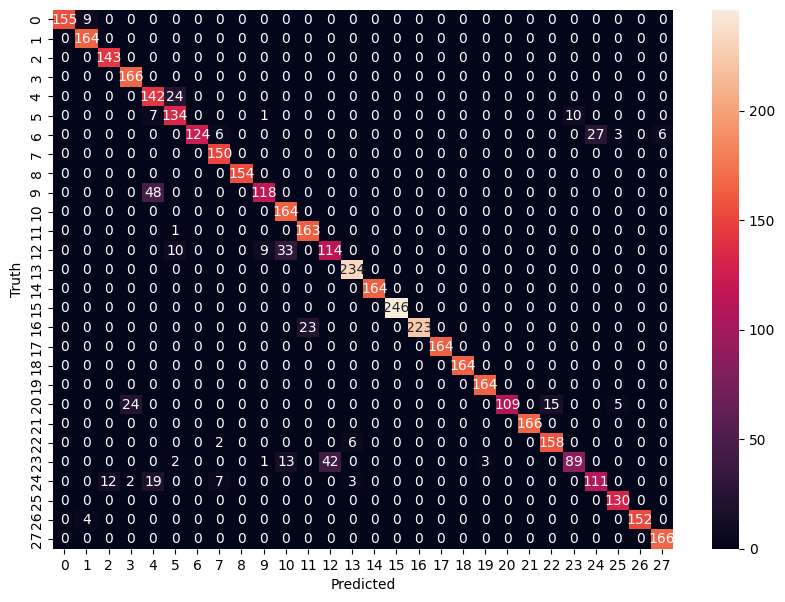

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(val) for val in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test_encoded, predictions=y_predicted_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

##### After, seeing confusion matrix of ANN with 3 layer we can say that model actually performs well with three hiddle layer of Relue

### Let's Apply CNN 

In [21]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the flattened data to 3D for the CNN model
X_train_reshaped = X_train_flattened.reshape(-1, 100, 100, 3)
X_test_reshaped = X_test_flattened.reshape(-1, 100, 100, 3)

cnn_model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten layer to convert 3D data to 1D

    keras.layers.Dense(128, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(56, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(28, activation="softmax")  # Output layer with softmax activation for multiclass classification
])

# Compile the model
cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
cnn_model.fit(X_train_reshaped, y_train_one_hot, epochs=10)

Epoch 1/10
439/439 [==============================] - 73s 164ms/step - loss: 0.3642 - accuracy: 0.9000
Epoch 2/10
439/439 [==============================] - 71s 161ms/step - loss: 0.0329 - accuracy: 0.9917
Epoch 3/10
439/439 [==============================] - 70s 159ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 4/10
439/439 [==============================] - 68s 155ms/step - loss: 6.8823e-05 - accuracy: 1.0000
Epoch 5/10
439/439 [==============================] - 68s 155ms/step - loss: 3.7691e-05 - accuracy: 1.0000
Epoch 6/10
439/439 [==============================] - 68s 155ms/step - loss: 2.4216e-05 - accuracy: 1.0000
Epoch 7/10
439/439 [==============================] - 68s 155ms/step - loss: 1.7008e-05 - accuracy: 1.0000
Epoch 8/10
439/439 [==============================] - 69s 157ms/step - loss: 1.2214e-05 - accuracy: 1.0000
Epoch 9/10
439/439 [==============================] - 69s 157ms/step - loss: 9.1783e-06 - accuracy: 1.0000
Epoch 10/10
439/439 [============================

In [22]:
# Evaluate the model on the test set
cnn_model.evaluate(X_test_reshaped, y_test_one_hot)

148/148 [==============================] - 6s 38ms/step - loss: 0.2222 - accuracy: 0.9647


[0.2221759855747223, 0.9647408723831177]

### We get 0.96 Accuracy score with only 0.22 Loss which really good as compared to ANN model.

#### Now, let's make Confusion matrix of CNN model and Evaluate Precision, Recall and F1 score value

In [23]:
# Make predictions
predictions = cnn_model.predict(X_test_reshaped)

# Convert one-hot encoded labels back to single labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test_labels, predicted_labels)

print("Classification Report:")
print(report)

148/148 [==============================] - 6s 40ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       164
           1       0.96      1.00      0.98       164
           2       1.00      1.00      1.00       143
           3       1.00      1.00      1.00       166
           4       1.00      0.86      0.93       166
           5       0.96      1.00      0.98       152
           6       1.00      0.98      0.99       166
           7       0.81      1.00      0.90       150
           8       1.00      1.00      1.00       154
           9       0.79      0.96      0.87       166
          10       0.79      1.00      0.88       164
          11       0.94      1.00      0.97       164
          12       0.95      0.95      0.95       166
          13       0.97      1.00      0.99       234
          14       1.00      1.00      1.00       164
          15       1.00      1.00      1.00       246
  

#### As we can see, Precision = 0.97, Recall = 0.96 and F1 = 0.96 indicate accuracy of CNN model

148/148 [==============================] - 6s 38ms/step


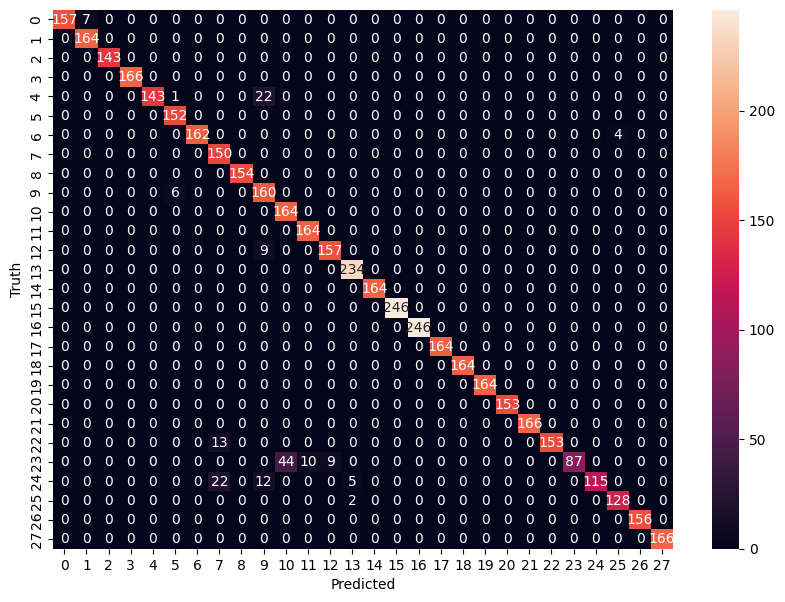

In [24]:
y_predicted = cnn_model.predict(X_test_reshaped)
y_predicted_labels = [np.argmax(val) for val in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


##### Confusion Matrix of CNN model clearly indicates accuracy of the model

# *Conclusion:*


##### 1. By applying an Artificial Neural Network (ANN) with Dense layers on the Fruit-360 dataset, we achieved an accuracy of 0.84 with a loss of 3.2849. The precision is 0.89, recall is 0.84, and the F1 score is 0.84.

##### 2. An Artificial Neural Network (ANN) with three hidden layers using the "ReLU" activation function performed better on the dataset compared to an ANN with only a Dense layer. The model achieved an accuracy score of 0.9199 with a loss of 0.4830. Additionally, the precision is 0.92, recall is 0.92, and the F1 score is 0.91.

##### 3. In the End, applying a Convolutional Neural Network (CNN) on the Artificial Neural Network (ANN) with three hidden layers performed exceptionally well on the dataset. This is evident from the accuracy score of the model, which is 0.96 with only 0.22 loss. Additionally, the precision is 0.97, recall is 0.96, and the F1 score is 0.96.

| Model                           | Accuracy Score | Loss   | Precision | Recall | F1-score |
|---------------------------------|-----------------|--------|-----------|--------|----------|
| ANN with single Layer           | 0.84            | 3.2849 | 0.89      | 0.84   | 0.84     |
| ANN with three hidden Layers    | 0.9199          | 0.4830 | 0.92      | 0.92   | 0.91     |
| CNN                             | 0.96            | 0.2222 | 0.97      | 0.96   | 0.96     |
 